In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [8]:
data =  pd.read_csv("monatszahlen2209_verkehrsunfaelle.csv") # Reading the CSV file 

data = data.iloc[:, :5] #Taking only the necessary columns

data.rename(columns={'MONATSZAHL': 'category'   # Renaming the columns of the DataFrame to more understandable names
                  , 'AUSPRÄGUNG': 'accidentType'
                  , 'JAHR': 'year'
                  , 'MONAT': 'month'
                  , 'WERT': 'value'}, inplace=True)

print(data.head())


         category accidentType  year   month  value
0  Alkoholunfälle    insgesamt  2022  202201    NaN
1  Alkoholunfälle    insgesamt  2022  202202    NaN
2  Alkoholunfälle    insgesamt  2022  202203    NaN
3  Alkoholunfälle    insgesamt  2022  202204    NaN
4  Alkoholunfälle    insgesamt  2022  202205    NaN


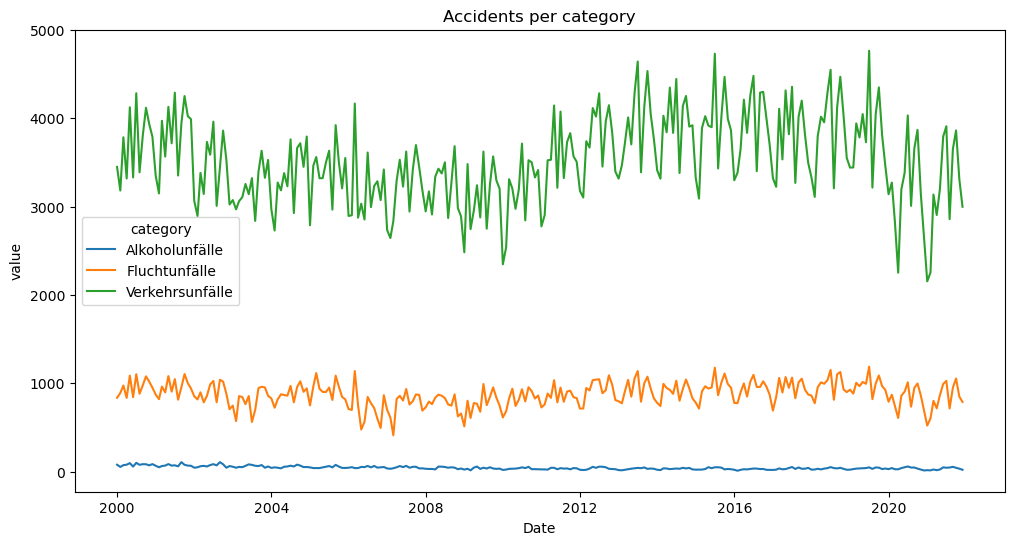

In [9]:

data = data[data['year'] <= 2021].reset_index(drop=True) # Taking only the years less than or equal to 2021 to put it on the graph

# Filtering the data according to the task
data = data[data["month"].str.lower() != "summe"] # There were some entries called 'summe' I filtered them out
data = data[data['accidentType'] == 'insgesamt']
data['month'] = data['month'].apply(lambda x: int(str(x)[-2:]) if str(x).isdigit() else x) # The format was 202101 so I want to take the last two digit only to get the month value

# Because I will create a graph I want to combine year and month as Date
data['Date'] = pd.to_datetime(data[['year', 'month']].assign(day=1)) #[day] is missing error was shown so I put the first day for each date 

plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='value', hue='category', data=data)
plt.title('Accidents per category')
plt.show()